Quantum object: dims=[[40], [40]], shape=(40, 40), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0. -0.  0. ...  0.  0.  0.]
 [-0.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0. -0.]
 [ 0.  0.  0. ...  0. -0.  0.]]
Quantum object: dims=[[40], [40]], shape=(40, 40), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   -0.02  0.   ...  0.    0.    0.  ]
 [-0.02  0.   -1.   ...  0.    0.    0.  ]
 [ 0.   -1.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.   -1.    0.  ]
 [ 0.    0.    0.   ... -1.    0.   -0.02]
 [ 0.    0.    0.   ...  0.   -0.02  0.  ]]
Quantum object: dims=[[40], [40]], shape=(40, 40), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   -0.04  0.   ...  0.    0.    0.  ]
 [-0.04  0.   -1.   ...  0.    0.    0.  ]
 [ 0.   -1.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.   -1.    0.  ]
 [ 0.    0.    0.   ... -1.    0.   -0.04]
 [ 0.    0.    0.   .

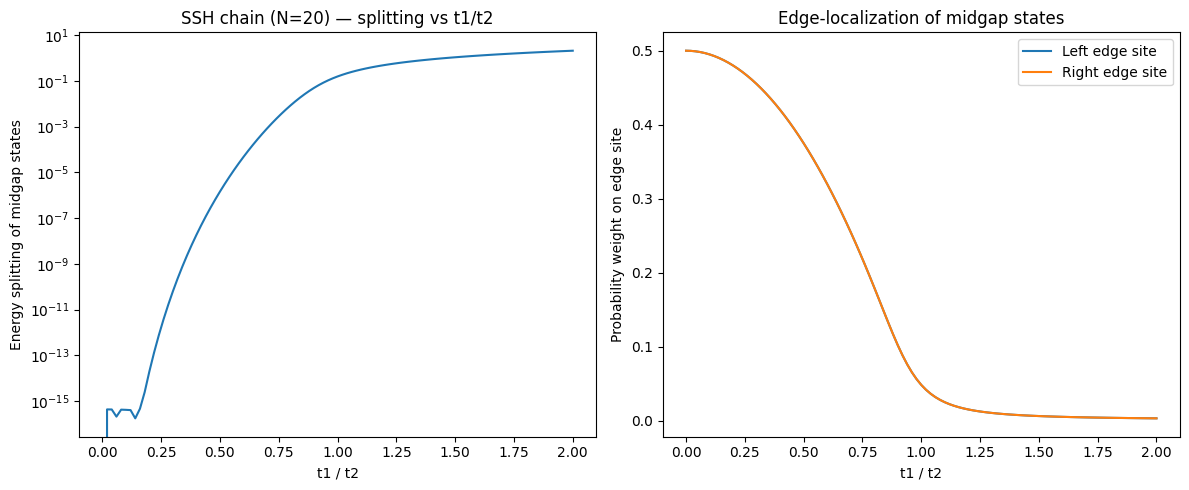

In [3]:
# File: ssh_edge_splitting.py
# pip install qutip numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj

def build_ssh_hamiltonian(t1, t2, N):
    L = 2 * N
    H = np.zeros((L, L), dtype=np.float64)
    for m in range(N):
        a = 2*m
        b = 2*m + 1
        H[a, b] = -t1
        H[b, a] = -t1
        if m < N - 1:
            a_next = 2*(m+1)
            H[b, a_next] = -t2
            H[a_next, b] = -t2
    return Qobj(H)

def get_midgap_states(H, n_mid=2):
    evals, evecs = H.eigenstates()
    absvals = np.abs(evals)
    inds = np.argsort(absvals)[:n_mid]
    mid_eigs = [evals[i] for i in inds]
    mid_states = [evecs[i] for i in inds]
    return mid_eigs, mid_states

def edge_weight(state, N):
    probs = np.abs(state.full().ravel())**2
    w_left = probs[0]
    w_right = probs[-1]
    return w_left, w_right

if __name__ == "__main__":
    N = 20
    t2 = 1.0
    t1_list = np.linspace(0.0, 2.0, 101)

    splittings = []
    edge_ls = []
    edge_rs = []

    for t1 in t1_list:
        H = build_ssh_hamiltonian(t1, t2, N)
        print(H)
        mid_eigs, mid_states = get_midgap_states(H, n_mid=2)
        if len(mid_eigs) < 2:
            splittings.append(np.nan)
            edge_ls.append(0)
            edge_rs.append(0)
        else:
            splitting = abs(mid_eigs[0] - mid_eigs[1])
            splittings.append(splitting)
            wl, wr = 0.0, 0.0
            for st in mid_states:
                l, r = edge_weight(st, N)
                wl += l; wr += r
            wl /= len(mid_states)
            wr /= len(mid_states)
            edge_ls.append(wl)
            edge_rs.append(wr)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(t1_list / t2, splittings)
    plt.yscale('log')
    plt.xlabel('t1 / t2')
    plt.ylabel('Energy splitting of midgap states')
    plt.title(f'SSH chain (N={N}) — splitting vs t1/t2')

    plt.subplot(1,2,2)
    plt.plot(t1_list / t2, edge_ls, label='Left edge site')
    plt.plot(t1_list / t2, edge_rs, label='Right edge site')
    plt.xlabel('t1 / t2')
    plt.ylabel('Probability weight on edge site')
    plt.legend()
    plt.title('Edge-localization of midgap states')

    plt.tight_layout()
    plt.show()

